# MACHINE LEARNING 1B - DATA ENGINEERING

# Process

## Know your Data

In [ ]:
Look at Summary statistics and visualizations
- Percentiles can help identify the range for most of the data
- Averages and medians can describe central tendency
- Correlations can indicate strong relationships


Visualize the data
- Box plots can identify outliers
- Density plots and histograms show the spread of data
- Scatter plots can describe bivariate relationships

## Clean your data

In [ ]:
Deal with missing value. Missing data affects some models more than others. 
Even for models that handle missing data, they can be sensitive to it (missing data for certain variables can result in poor predictions)

Choose what to do with outliers
- Outliers can be very common in multidimensional data.
- Some models are less sensitive to outliers than others. Usually tree models are less sensitive to the presence of outliers. However regression models, or any model that tries to use equations, could definitely be effected by outliers.
- Outliers can be the result of bad data collection, or they can be legitimate extreme values.

Does the data needs to be aggregated

## Augment your data

In [ ]:
Feature engineering is the process of going from raw data to data that is ready for modeling. It can serve multiple purposes:
- Make the models easier to interpret (e.g. binning)
- Capture more complex relationships (e.g. NNs)
- Reduce data redundancy and dimensionality (e.g. PCA)
- Rescale variables (e.g. standardizing or normalizing)

Different models may have different feature engineering requirements. Some have built in feature engineering.

# Normalization, Standardization, Binning

## Normalization

In [ ]:
Normalisation:
  - Data Z is rescaled such that any specific Z will now be 0 ≤ Z ≤ 1, and is done through this formula: [(x - min(x)] / [ max(x) - min(x) ]
  - Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients.      
  - After normalisation, features are now more consistent with each other, which will allow us to evaluate the output of our future models better.
  - Normalization makes the data better conditioned for convergence.
  - Normalizing will ensure that a convergence problem does not have a massive variance, making optimization feasible.

However:
  - When data is proportional, normalizing might not provide correct estimators. 
  - Or, when the scale between your data features does matters so you want to keep in your dataset.
  - You need to think about your data, and understand if the transformations you’re applying are in line with the outcomes you’re searching for.

In [1]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

# load the iris dataset
iris = load_iris()

# separate the data from the target attributes
X = iris['data']
y = iris['target']

# normalize the data attributes 
normalized_X = preprocessing.normalize(X)

In [ ]:
Normalisation vs Standardisation
  - Keep in mind, there is some debate stating it is better to have the input values centred around 0 — standardization — rather than between 0 and 1. 
  - So doing your research is important as well, so you understand what type of data is needed by your model.

## Standardization

In [ ]:
Standardization
  - Here your data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula: ( xi - μ) / 𝛔 
  - good for comparing features that have large difference of units or scales
  - good for running models (logistic regression, SVMs, perceptrons, neural networks etc.) as the estimated weights will update similarly rather than at different rates during the build process. 
  - Standardizing tends to make the training process well behaved because the numerical condition of the optimization problems is improved. (example, for PCA, need to have features centered around mean)

However
  - if you do standardize your data be warned you might be discarding some information. 
  - If that information is not needed, the process can be helpful else it will impede your results

In [2]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

# load the Iris dataset
iris = load_iris()

# separate the data from the target attributes
X = iris['data']
y = iris['target']

# standardize the data attributes
standardized_X = preprocessing.scale(X)

## Binning

In [ ]:
A 3rd option is binning
  - Consider the latitude feature, which has a geo point of the area in question
  - We’re going to made new columns for each latitude range, and encode each value in our dataset with a 0 or 1 to see if it is within that latitude range.

In [ ]:
# Create range for your new columns
lat_range = zip(xrange(32, 44), xrange(33, 45))
new_df = pd.DataFrame()

# Iterate and create new columns, with the 0 and 1 encoding
for r in lat_range
        new_df["latitude_%d_to_%d" % r] = df["latitude"].apply(
            lambda l: 1.0 if l >= r[0] and l < r[1] else 0.0)
new_df

In [ ]:
Now that we can binned values, we have a binary value for each latitude in California. 
With this additional approach, you have another way to clean your data and get it ready for modelling.

## Example on Iris

### 3 Methods for importing Iris Dataset

In [4]:
# Seaborn Method
import seaborn as sns
iris_sns = sns.load_dataset('iris')
iris_sns.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Pandas
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Sckikit-learn
from sklearn.datasets import load_iris
iris_scikit = load_iris()
# This will produce arrays of data and target

### Import Iris, standardise with Scale, convert into a pandas df

In [7]:
# Pandas
import pandas as pd
from sklearn import preprocessing

iris_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# separate the data from the target attributes
X = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris_df['species']

# Get column names first (provided data was organised this way)
names = ['sepal_length','sepal_width','petal_length','petal_width']   # it could be : iris_df.columns  but we have non numeric values in the last column (can not be standardized)

# standardize the data attributes
standardized_X = preprocessing.scale(X)
standardized_X = pd.DataFrame(standardized_X, columns=names)          # convert into a pandas df 
standardized_X = pd.concat(( standardized_X,y),axis=1)                # add the column with string values
standardized_X.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


### Use Scikit Standard Scaler

In [19]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

iris_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# separate the data from the target attributes
X = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris_df['species']

# Get column names first (provided data was organised this way)
names = ['sepal_length','sepal_width','petal_length','petal_width']   # it could be : iris_df.columns  but we have non numeric values in the last column (can not be standardized)

# standardize the data attributes
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=names)

scaled_df = pd.concat((scaled_df,y),axis=1)                # add the column with string values
scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


# Missing Values

### Fill with mean, median, mode of a column

In [ ]:
# the easiest and laziest way to replace: complete missing age with median    
df['Age'].fillna(df['Age'].median(), inplace = True)

In [ ]:
# Using the scikit Imputer: 'mean', 'median', 'most_frequent' are available

from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X2 = Imputer.fit_transform(X)
X2


### Fill with conditions and formulae

In [ ]:
XXXXXXXXXXXXXXXXXXXXXX

### Fill by interpolation

In [ ]:
XXXXXXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
https://www.nbshare.io/notebook/923270235/Polynomial-Interpolation-Using-Python-Pandas-Numpy-And-Sklearn/
    
    
    

# Exploration

### Using groupby in order to get statistics

In [ ]:
# to get value counts per Age, PClass, Survived
df.groupby(['Age', 'Pclass'])['Survived'].value_counts

# to get percentage per Age, PClass, Survived
df.groupby(['Age', 'Pclass'])['Survived'].value_counts(normalize=True)df

### Get mean, std deviation of a group and subgroup

In [ ]:
# Get mean age per Pclass and gender
df.groupby(['Pclass', 'Sex'])['Age'].mean()

# Get age standard deviation per Pclass and gender
df.groupby(['Pclass', 'Sex'])['Age'].std()

### Bin age data using the cut method

In [ ]:
# This is convenient
df['AgeGroup'] = pd.cut(x=df['Age'], bins=[0,10, 20, 30, 40,50,60,70], labels=['0s', '10s', '20s', '30s', '40s', '50s','60+'])

### Replace Strings by numerical values

In [ ]:
# with where A classic
df['Gender'] = np.where(df['Sex'] == 'male', 1,0)

In [ ]:
# With map
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)

d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

# Visual Exploration

In [9]:
# import required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

### Multiplots using facetgrid

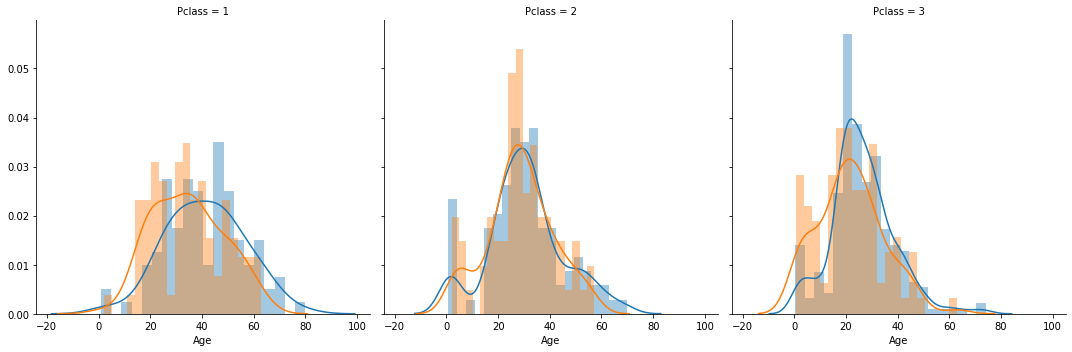

In [10]:
# import data
df = pd.read_csv('titanic_train.csv')

g = sns.FacetGrid(df, col='Pclass', hue= 'Sex',height=5, aspect=1,)
g.map(sns.distplot, 'Age', bins = 20)

### Beautiful Correlation Matrix

In [12]:
df = pd.read_csv('data.csv')
df_test = df.drop(['perimeter_mean','area_mean','perimeter_se','area_se','perimeter_worst','area_worst', 
                  'concavity_mean', 'concavity_se', 'concavity_worst'], axis=1)

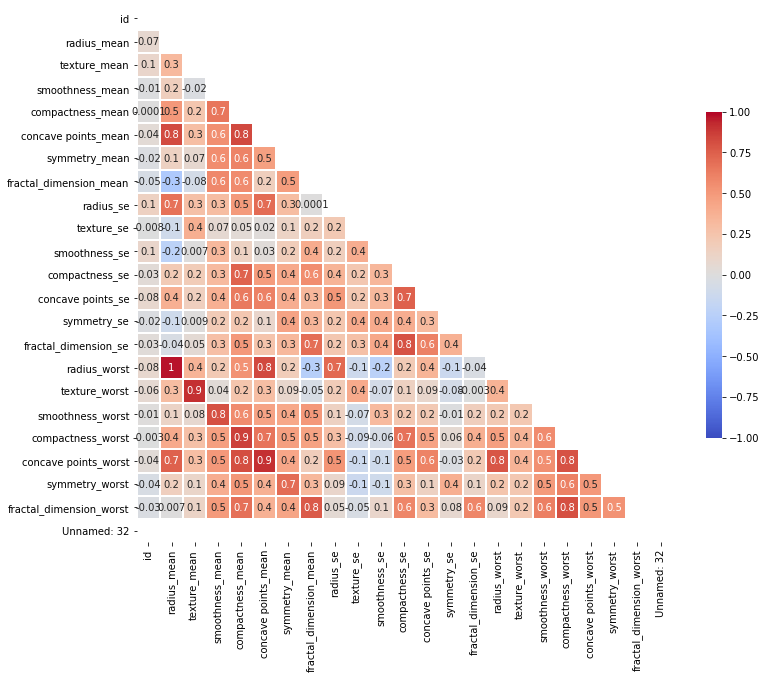

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))  
mask = np.triu(df_test.corr())

sns.heatmap(df_test.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='white', square=True, mask = mask, cbar=True, cbar_kws={"shrink": .5}, annot=True, fmt='.1g')


### Ploting multiple graphs with dual values

In [15]:
df = pd.read_csv('data.csv')

# drop columns
df = df.drop(['id','Unnamed: 32'], axis=1)

# replace diagnosis with numerical values
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1,0)

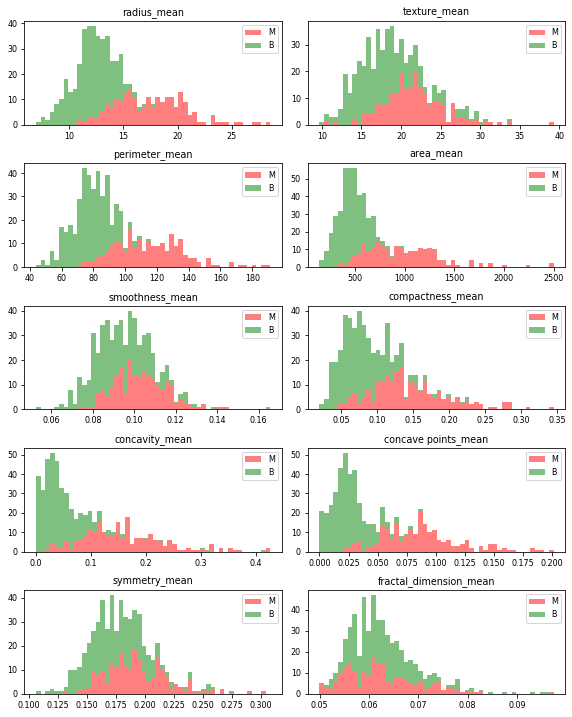

In [16]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM = df[df['diagnosis'] ==1]
dfB = df[df['diagnosis'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])

    plt.tight_layout()
plt.show()

### Ploting frequency and cumulative frequency

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt